<div style="border:solid green 2px; padding: 20px">
    
<b>Hello, Bryan!</b> We're glad to see you in code-reviewer territory. You've done a great job on the project, but let's get to know each other and make it even better! We have our own atmosphere here and a few rules:


1. I work as a code reviewer, and my main goal is not to point out your mistakes, but to share my experience and help you become a data analyst.
2. We speak on a first-come-first-served basis.
3. if you want to write or ask a question, don't be shy. Just choose your color for your comment.  
4. this is a training project, you don't have to be afraid of making a mistake.  
5. You have an unlimited number of attempts to pass the project.  
6. Let's Go!


---
I'll be color-coding comments, please don't delete them:

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__


Remarks. Some recommendations.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Success. Everything is done succesfully.
</div>
    
---
    
I suggest that we work on the project in dialogue: if you change something in the project or respond to my comments, write about it. It will be easier for me to track changes if you highlight your comments:   
    
<div class="alert alert-info"> <b>Student сomments:</b> Student answer..</div>
    
All this will help to make the recheck of your project faster. If you have any questions about my comments, let me know, we'll figure it out together :)   
    
---

Name:
Project 5: Planing Advertising Campaign

Introduction:
This project aims to identify key patterns and factors that determine the success of video games sold by the online store Ice. By analyzing historical data, including user and expert reviews, genres, platforms, and sales figures, we seek to develop a model for predicting the potential success of upcoming games. This information will enable Ice to make informed decisions regarding advertising campaigns and resource allocation for the year 2017.To achieve this goal, we will first conduct thorough exploratory data analysis (EDA) on the provided dataset, focusing on data from 2012 to 2016.The EDA will involve examining distributions, relationships, and trends within the data to identify potential factors influencing game success. We will investigate the impact of various features, such as user and expert ratings, genres, platforms, and ESRB ratings, on game sales.
The results of this project will empower Ice to strategically allocate advertising resources and focus on promoting games with a higher likelihood of success. This will ultimately optimize marketing efforts and potentially increase revenue for the online store.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

An excellent practice is to describe the goal and main steps in your own words (a skill that will help a lot on a final project). It would be good to add the progress and purpose of the study.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from scipy.stats import ttest_ind




In [2]:
games = pd.read_csv('games.csv')

In [3]:
games.columns = games.columns.str.lower()

Made column names lowercase

In [4]:
games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Below I changed year_of_release from float to int64 because we are not working with partial years. I also changed user_score from object to int64 because game scores are measured with decimals.

In [5]:
# Change 'year_of_release' to int64
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')  

# Change 'user_score' to float64
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce').astype('float64')

<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

Great

In [6]:
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [7]:
# user_score_median = games['user_score'].median()
# user_score_mean = games['user_score'].mean()

# print(f'Median User Score: {user_score_median}')
# print(f'Mean User Score: {user_score_mean}')

In [8]:
# critic_score_median = games['critic_score'].median()
# print(f'Median Critic Score: {critic_score_median}')

# critic_score_mean = games['critic_score'].mean()
# print(f'Mean Critic Score: {critic_score_mean}')

In [9]:
# games = games.assign(
#     critic_score=games['critic_score'].fillna(critic_score_mean),
#     user_score=games['user_score'].fillna(user_score_mean)
# )

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Substituting missing values for the median/mean/mode/zero can skew the data and introduce some problem in further analysis. Let me elaborate on the causes and consequences of this approach.

1. distortion of the distribution: When we replace missing values with the median, we are actually adding new values to the data set. This can lead to a shift in the distribution and distort the statistical properties of the data. Replacing by the median can make the data look more homogeneous than it actually is.

2. Possible consequences: Substituting missing values for the median can affect many aspects of data analysis:

   - Statistical tests: Distorted data can lead to incorrect conclusions in statistical tests. The use of skewed data can lead to incorrect results in significance tests and estimation of effects between groups or conditions.

   - Modeling: When distorted data are used to build models, models may also suffer from distortion and produce incorrect predictions or conclusions. This can be particularly important if missing values are associated with key model variables.

   - Inferences and interpretation: Distorted data can lead to incorrect inferences and misinterpretation of results. For example, if missing values are associated with important factors, replacing with the median may lead to misunderstanding the effect of these factors on the variable under study.


 So, instead of replacing missing values with median, it is recommended to apply other approaches to handle missing data such as:

- Removing records with missing values: If the number of records with missing values is small compared to the total amount of data, deleting these records may be a reasonable approach.

- Data Imputation: Using more sophisticated techniques such as data imputation can help recover missing values based on other variables in the dataset.For example, machine learning models can be used to predict missing values based on the available data.
It is important to assess the reason for missing values and choose an approach to handle them based on the specifics of the data and the objectives of the study.Proper handling of missing values helps to maintain the accuracy and reliability of data analysis.
   


In [10]:
games.columns[games.isnull().any()]

Index(['name', 'year_of_release', 'genre', 'critic_score', 'user_score',
       'rating'],
      dtype='object')

Checking to see what rows can be dropped if any. 

In [11]:
columns_to_check = ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']

missing_percentages = games[columns_to_check].isnull().mean() * 100

print(missing_percentages)

name                0.011965
year_of_release     1.609333
genre               0.011965
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64


In [12]:
games['user_score'] = games['user_score'].replace('tbd', np.nan)



<div class="alert alert-block alert-success">✔️
    

__Reviewer's comment №1__

That's right, tbd is the same in meaning as skip

In [13]:
# columns_to_drop_na = ['name', 'year_of_release', 'genre']
# games.dropna(subset=columns_to_drop_na, inplace=True)

In [14]:
columns_to_drop_na = ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
games.dropna(subset=columns_to_drop_na, inplace=True)

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__
    
Lines with gaps in the Name are best deleted. We know almost nothing about these games.

Dopped missing rows in 'name', 'year_of_release', 'genre' because the percentage of missing values was so low. also, dropped missing rows in 'critic_score' and 'user_score' on the advice from the reviewer so the data would not be skewed.

I think there are missing values in Critic Score, User Score and Rating because not every game gets reviewed, and ratings and scores may not have been a process when older games were made.

I filled TBD's with the mean because they have not been rated yet.


In [15]:
print("\nmissing values after dropping:")
print(games.isnull().sum())


missing values after dropping:
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [16]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

games.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


Checking for duplicates.

In [17]:
# Check for duplicate rows in the DataFrame
duplicate_rows = games[games.duplicated()]

# Display the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Display the number of duplicate rows
num_duplicates = duplicate_rows.shape[0]
print(f"\nNumber of duplicate rows: {num_duplicates}")

Duplicate Rows:
Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating, total_sales]
Index: []

Number of duplicate rows: 0


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There is no check for duplicates. Please add them.
    


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Please, add an intermediate conclusion about this introductory part. What have been done, what hypotheses about the data do we have and what we are going to do next

So far, I have cleaned the data. I have made column names consistent, corrected Dtype, removed missing rows and checked for duplicates. The data should be more suitable now because of the data cleaning and next the data will be analyzed.

Year_of_Release

In [18]:
games_per_year = games['year_of_release'].value_counts().sort_index()
print(games_per_year)

year_of_release
1985      1
1988      1
1992      1
1994      1
1996      7
1997     13
1998     25
1999     30
2000    102
2001    256
2002    455
2003    498
2004    476
2005    562
2006    528
2007    590
2008    592
2009    550
2010    429
2011    454
2012    313
2013    266
2014    253
2015    211
2016    212
Name: count, dtype: Int64


The graph shows that in early gaming years there were not a lot of games released but as time went on more games were released with a peak in 2008 and 2009. Then a rapid decline happened and then leveled off from 2012 to 2016.

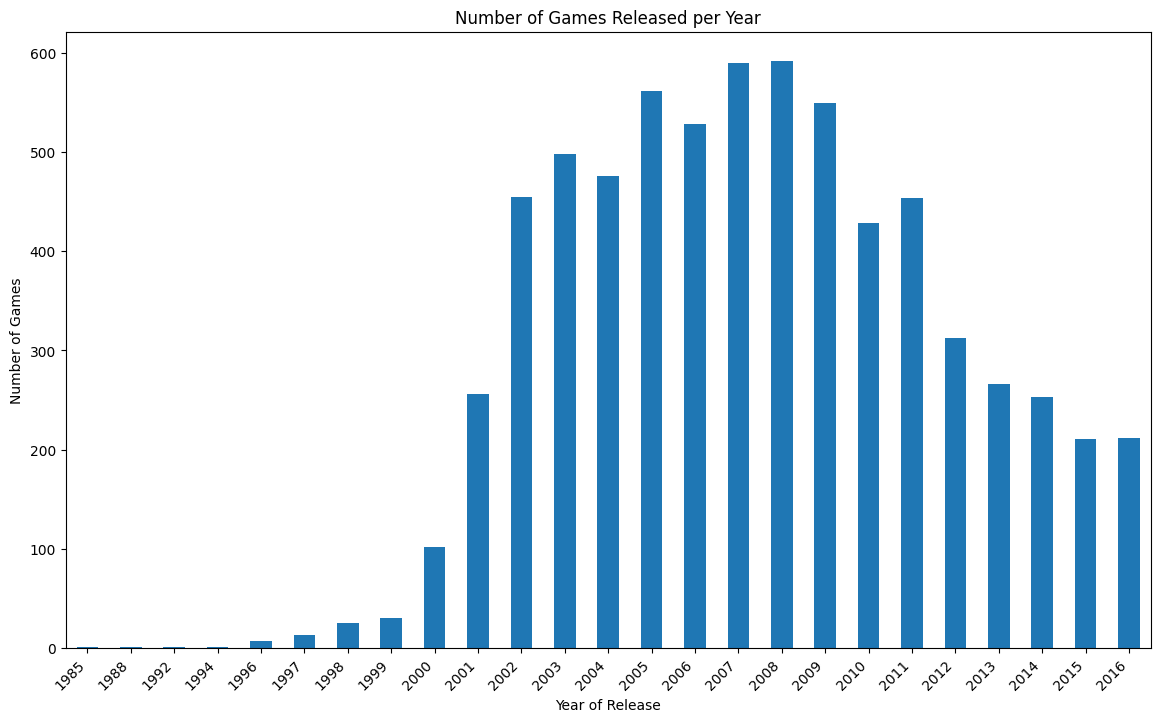

In [19]:
games_per_year.plot(kind='bar', figsize=(14, 8)) 
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45, ha='right')

plt.show()

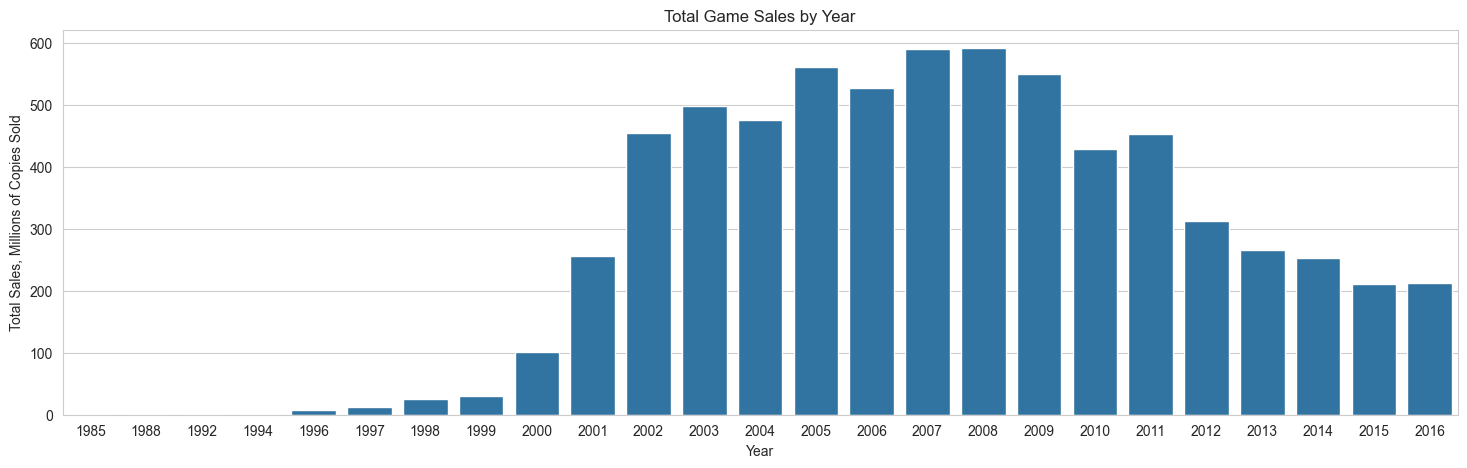

In [20]:
games_sales = games.groupby('year_of_release').agg({'name':'count'})
games_sales = games_sales.rename(columns={'name':'number of games sold'}, level=0)
games_sales.index = games_sales.index.rename('year')

games_sales = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data=games, x='year_of_release')
plt.title('Total Game Sales by Year')
plt.ylabel('Total Sales, Millions of Copies Sold')
plt.xlabel('Year')
plt.show()

<div class="alert alert-block alert-warning">📝

__Reviewer's comment №1__
    

It would be nice to add visualizations. In order to build a graph, you need to group the data (in our case, the year of release and quantity)
    
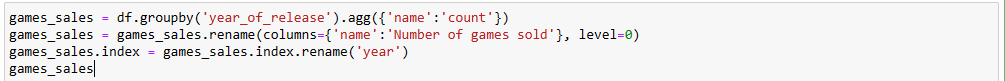
    
---
Next, using the sns library (it's powerful, and you can do anything with it). From the data in the grouped table, plot the graph. You can have it if you want =) The main thing is to play around with the arguments and figure it out. In future projects you will build powerful graphs, this skill will come in handy there    
    
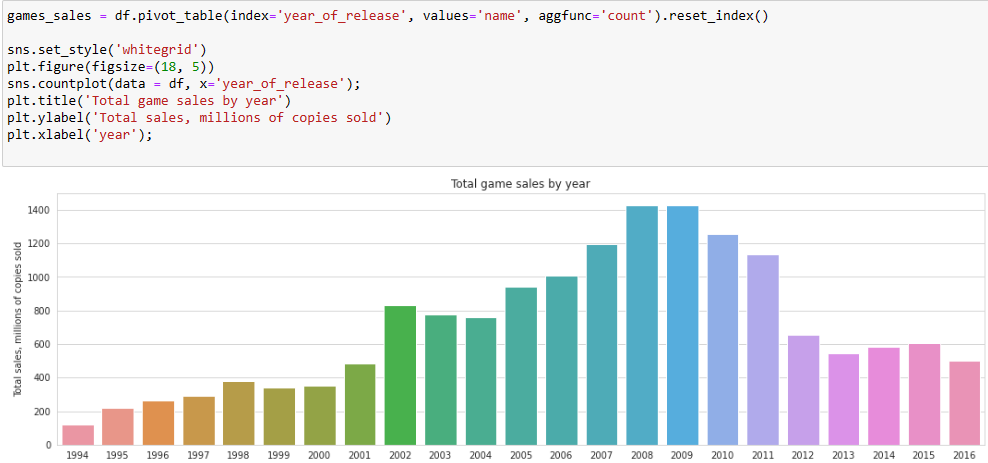
</div>

Platform 

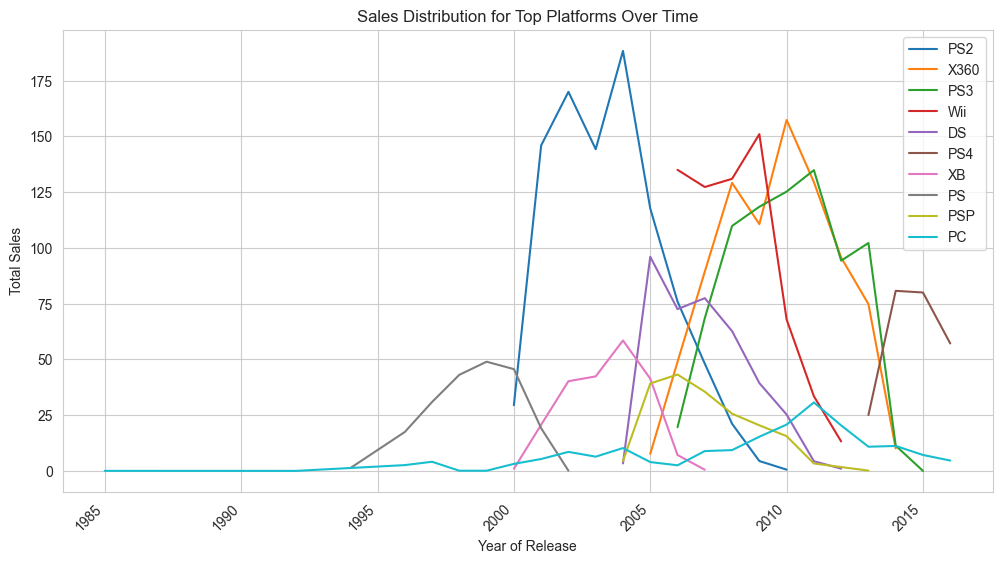

Platforms with low sales in recent years: Index([], dtype='object', name='platform')


In [21]:
#Calculate total sales per platform
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)


#Choose top platforms
top_platforms = platform_sales.head(10).index


#Build distributions for top platforms over time
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = games[games['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data.index, platform_data.values, label=platform)

plt.title('Sales Distribution for Top Platforms Over Time')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show()



sales_threshold = 0.1 
recent_years = games['year_of_release'].max() - 25  
recent_platform_sales = games[games['year_of_release'] >= recent_years].groupby('platform')['total_sales'].sum().fillna(0)
platforms_with_low_sales = recent_platform_sales[recent_platform_sales <= sales_threshold].index
platforms_with_low_sales_overall = platform_sales[platform_sales.index.isin(platforms_with_low_sales)].index
print("Platforms with low sales in recent years:", platforms_with_low_sales_overall)

It looks like the lifespan of a platform is just under 10 years with a manufacturer releasing a new one almost every year.

Looking at total sales 

In [22]:
# Filter the data for the years 2012 to 2016
filtered_data = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Select only numerical columns
numerical_columns = filtered_data.select_dtypes(include=[np.number]).columns

# Drop rows with missing values in numerical columns
filtered_data = filtered_data.dropna(subset=numerical_columns)

# Define the features (X) and the target (y)
X = filtered_data[numerical_columns].drop(columns=['total_sales'])
y = filtered_data['total_sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display the first few rows of filtered_data and the shapes of X_train and X_test
print(filtered_data.head())
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

Mean Squared Error: 4.5802700059502494e-05
R^2 Score: 0.9999599317599192
                          name platform  year_of_release    genre  na_sales  \
16          Grand Theft Auto V      PS3             2013   Action      7.02   
23          Grand Theft Auto V     X360             2013   Action      9.66   
34  Call of Duty: Black Ops II      PS3             2012  Shooter      4.99   
35  Call of Duty: Black Ops II     X360             2012  Shooter      8.25   
42          Grand Theft Auto V      PS4             2014   Action      3.96   

    eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
16      9.09      0.98         3.96          97.0         8.2      M   
23      5.14      0.06         1.41          97.0         8.1      M   
34      5.73      0.65         2.42          83.0         5.3      M   
35      4.24      0.07         1.12          83.0         4.8      M   
42      6.31      0.38         1.97          97.0         8.3      M   

    total_sales  
1

<div class="alert alert-block alert-success">✔️

__Reviewer's comment №1__


For the purpose of predicting sales for the next year, even traditional businesses rarely take data for more than 2-3 years. And in such a dynamically changing industry as computer games, you shouldn't take too long a time interval - otherwise you're bound to capture trends that are already outdated. But you shouldn't take too short a period either

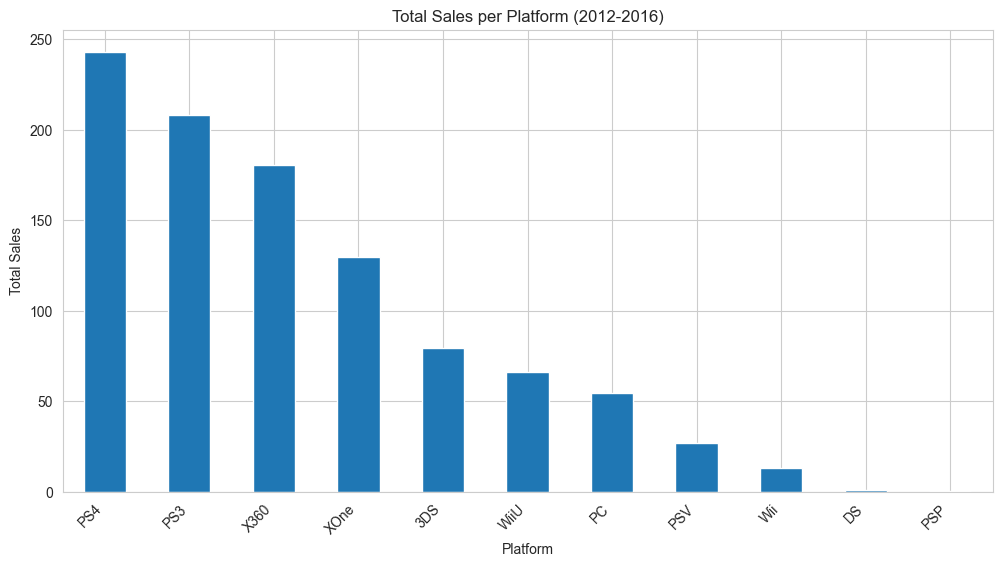

In [23]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Calculate total sales per platform for the filtered data
filtered_platform_sales = filtered_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Plot total sales per platform
plt.figure(figsize=(12, 6))
filtered_platform_sales.plot(kind='bar')
plt.title('Total Sales per Platform (2012-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

Play station is leading in sales but X360 and 3DS are not far behind. PS4, X360 and 3DS will continue to grow while the others fade. I think the three platforms to watch for the future are PS4, X360 and 3DS.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__



Above you did a cross-section of logs from 2012 to 2016 - right. 

Now you need to perform EDA and hypotheses only on the current period `filtered_data`. Please correct it

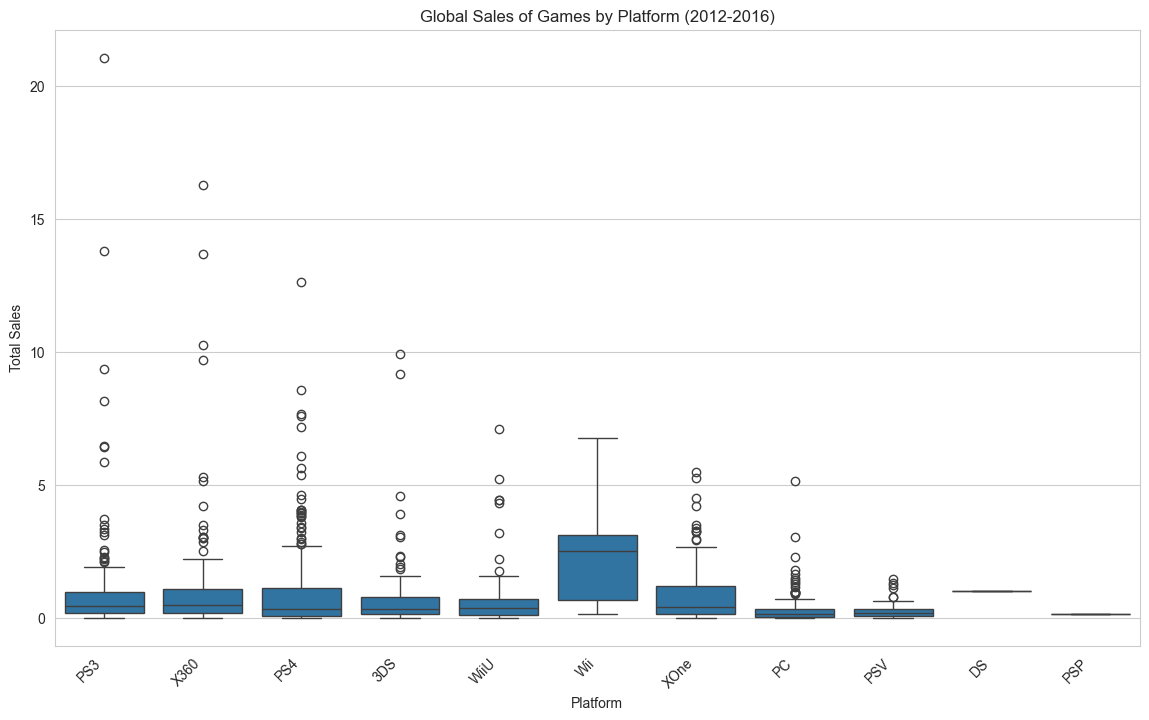

In [24]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_games)
plt.title('Global Sales of Games by Platform (2012-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

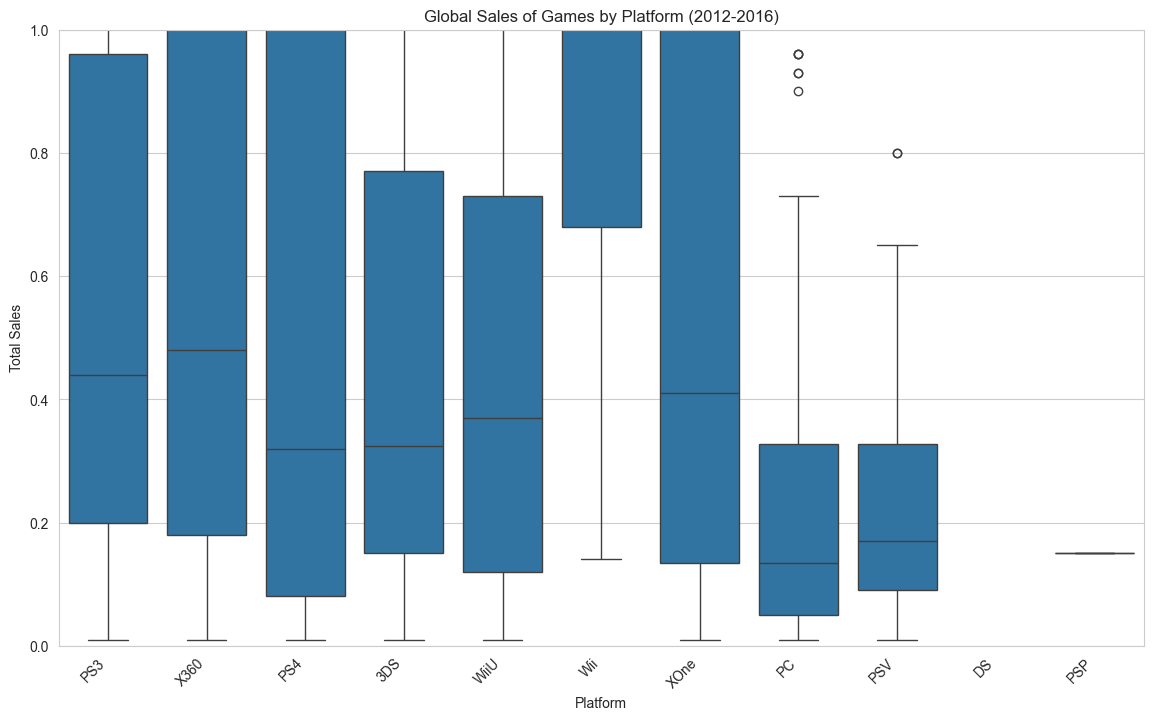

In [25]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=filtered_games)
plt.title('Global Sales of Games by Platform (2012-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Adjust the y-axis limit to focus on the lower part of the boxplots
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

Unfortunately, this graph only shows the outliers, and does not show the median and 75% quantile. For more reasonable conclusions it is necessary to make an additional graph, where only the lower part of the boxplots will be displayed. This can be achieved, for example, by setting the parameter ylim
</div>

The Wii leads by a big margin in total game sales. The next three are similar and as you go down the list the number of sales diminishes. Many other platforms had successful games as outliers but the Wii did not.

Critic_Score, User_Score

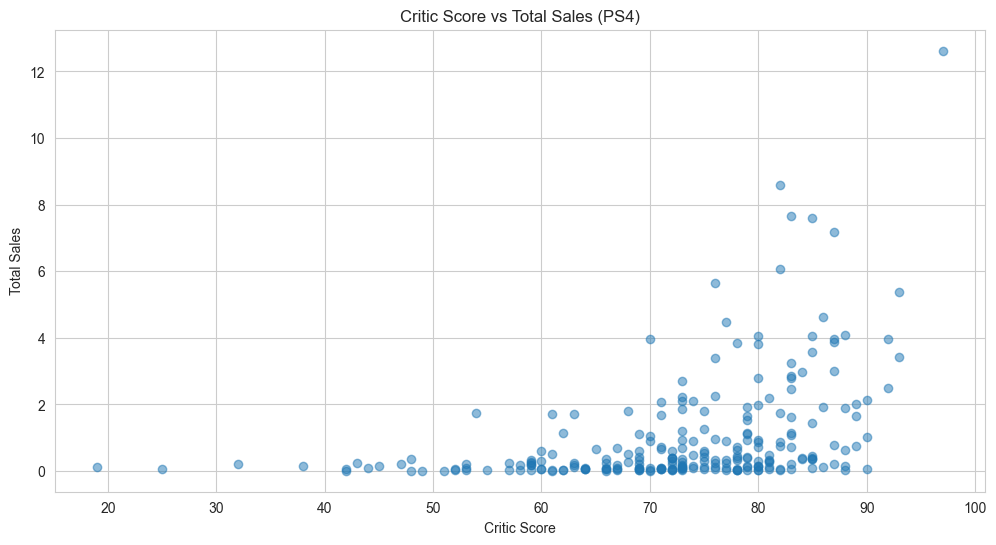

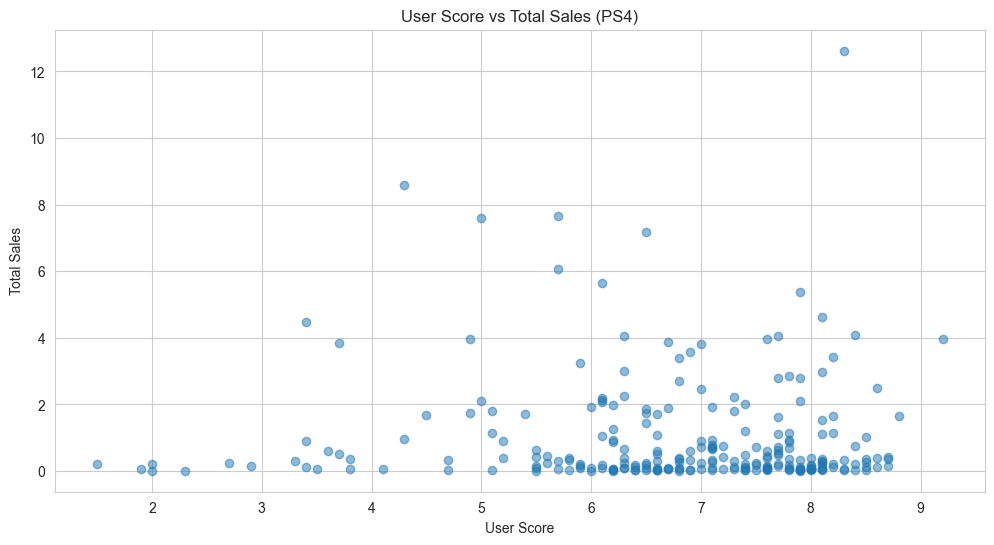

Correlation between Critic Score and Total Sales (PS4): 0.4035729107357781
Correlation between User Score and Total Sales (PS4): -0.03088781296873358


In [26]:
# Filter the data for the PS4 platform
ps4_games = games[games['platform'] == 'PS4']

# Scatter plot for Critic Score vs Total Sales
plt.figure(figsize=(12, 6))
plt.scatter(ps4_games['critic_score'], ps4_games['total_sales'], alpha=0.5)
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.show()

# Scatter plot for User Score vs Total Sales
plt.figure(figsize=(12, 6))
plt.scatter(ps4_games['user_score'], ps4_games['total_sales'], alpha=0.5)
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')
plt.show()

# Calculate the correlation between Critic Score and Total Sales
critic_corr = ps4_games['critic_score'].corr(ps4_games['total_sales'])
print(f'Correlation between Critic Score and Total Sales (PS4): {critic_corr}')

# Calculate the correlation between User Score and Total Sales
user_corr = ps4_games['user_score'].corr(ps4_games['total_sales'])
print(f'Correlation between User Score and Total Sales (PS4): {user_corr}')

It seems that critic score does affect games purchased. The better the score the more games purchased. This is not absolute and there may be other factors not identified by this plot.

User scores do not seem to have a big impact on sales. This potentially means users do not look at other users’ opinions on whether they will purchase a game.


<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__
    
    
The assignment is to relate the conclusions to the sales of games on other platforms, because the conclusions based on calculations across multiple platforms look "weightier" and more convincing
</div>

In [27]:
# Filter the data for the PS4, X360, and 3DS platforms
ps4_games = games[games['platform'] == 'PS4']
x360_games = games[games['platform'] == 'X360']
ds3_games = games[games['platform'] == '3DS']

# Find common games between PS4 and X360
common_games_ps4_x360 = pd.merge(ps4_games, x360_games, on='name', suffixes=('_ps4', '_x360'))

# Find common games between the result and 3DS
common_games_all = pd.merge(common_games_ps4_x360, ds3_games, on='name')

# Compare sales
common_games_comparison = common_games_all[['name', 'total_sales_ps4', 'total_sales_x360', 'total_sales']]
common_games_comparison.columns = ['name', 'total_sales_ps4', 'total_sales_x360', 'total_sales_3ds']
print(common_games_comparison)

                       name  total_sales_ps4  total_sales_x360  \
0  LEGO Marvel Super Heroes             1.62              2.22   
1     Skylanders SWAP Force             0.38              1.32   
2                  Terraria             0.07              0.68   

   total_sales_3ds  
0             0.89  
1             0.24  
2             0.09  


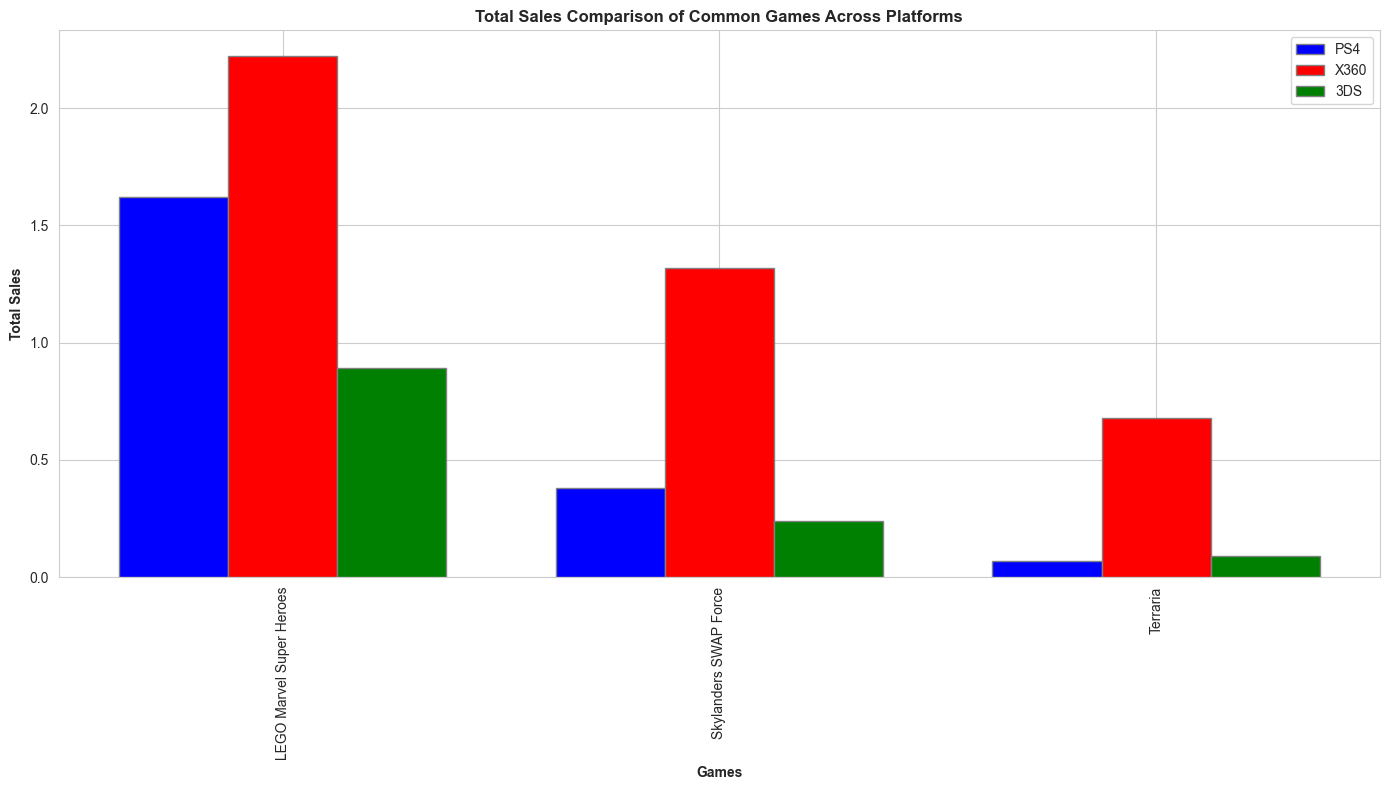

In [28]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Set the bar width
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = np.arange(len(common_games_comparison))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bars
plt.bar(r1, common_games_comparison['total_sales_ps4'], color='b', width=bar_width, edgecolor='grey', label='PS4')
plt.bar(r2, common_games_comparison['total_sales_x360'], color='r', width=bar_width, edgecolor='grey', label='X360')
plt.bar(r3, common_games_comparison['total_sales_3ds'], color='g', width=bar_width, edgecolor='grey', label='3DS')

# Add labels
plt.xlabel('Games', fontweight='bold')
plt.ylabel('Total Sales', fontweight='bold')
plt.title('Total Sales Comparison of Common Games Across Platforms', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(common_games_comparison))], common_games_comparison['name'], rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

It looks like X360 out sells the other platforms when comparing the same games.

Genre 

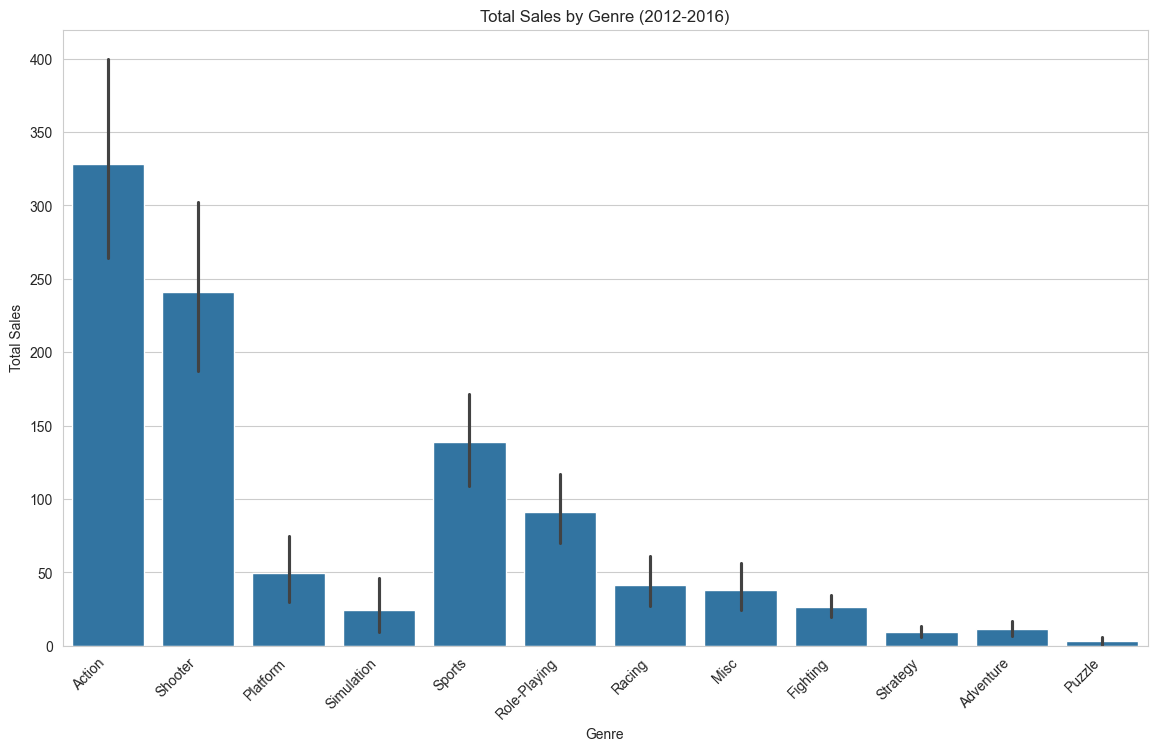

In [29]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Plot total sales by genre
plt.figure(figsize=(14, 8))
sns.barplot(x='genre', y='total_sales', data=filtered_games, estimator=sum)
plt.title('Total Sales by Genre (2012-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

Action and shooter games are the highest sellers while puzzle and strategy games have the lowest sales. It seems like people tend to like action games over thinking games.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

Please correct the conclusions after correcting the actual period

NA_sales, EU_sales, JP_sales, Other_sales

Top five platforms in NA_SALES:
platform
X360    106.82
PS4      84.16
PS3      76.97
XOne     75.58
WiiU     30.69
Name: na_sales, dtype: float64

Top five platforms in EU_SALES:
platform
PS4     111.78
PS3      78.30
X360     57.00
XOne     42.02
PC       31.51
Name: eu_sales, dtype: float64

Top five platforms in JP_SALES:
platform
3DS     26.54
PS3     20.29
WiiU    10.17
PS4      9.29
PSV      7.05
Name: jp_sales, dtype: float64

Top five platforms in OTHER_SALES:
platform
PS4     37.77
PS3     32.31
X360    15.40
XOne    11.59
PC       5.08
Name: other_sales, dtype: float64



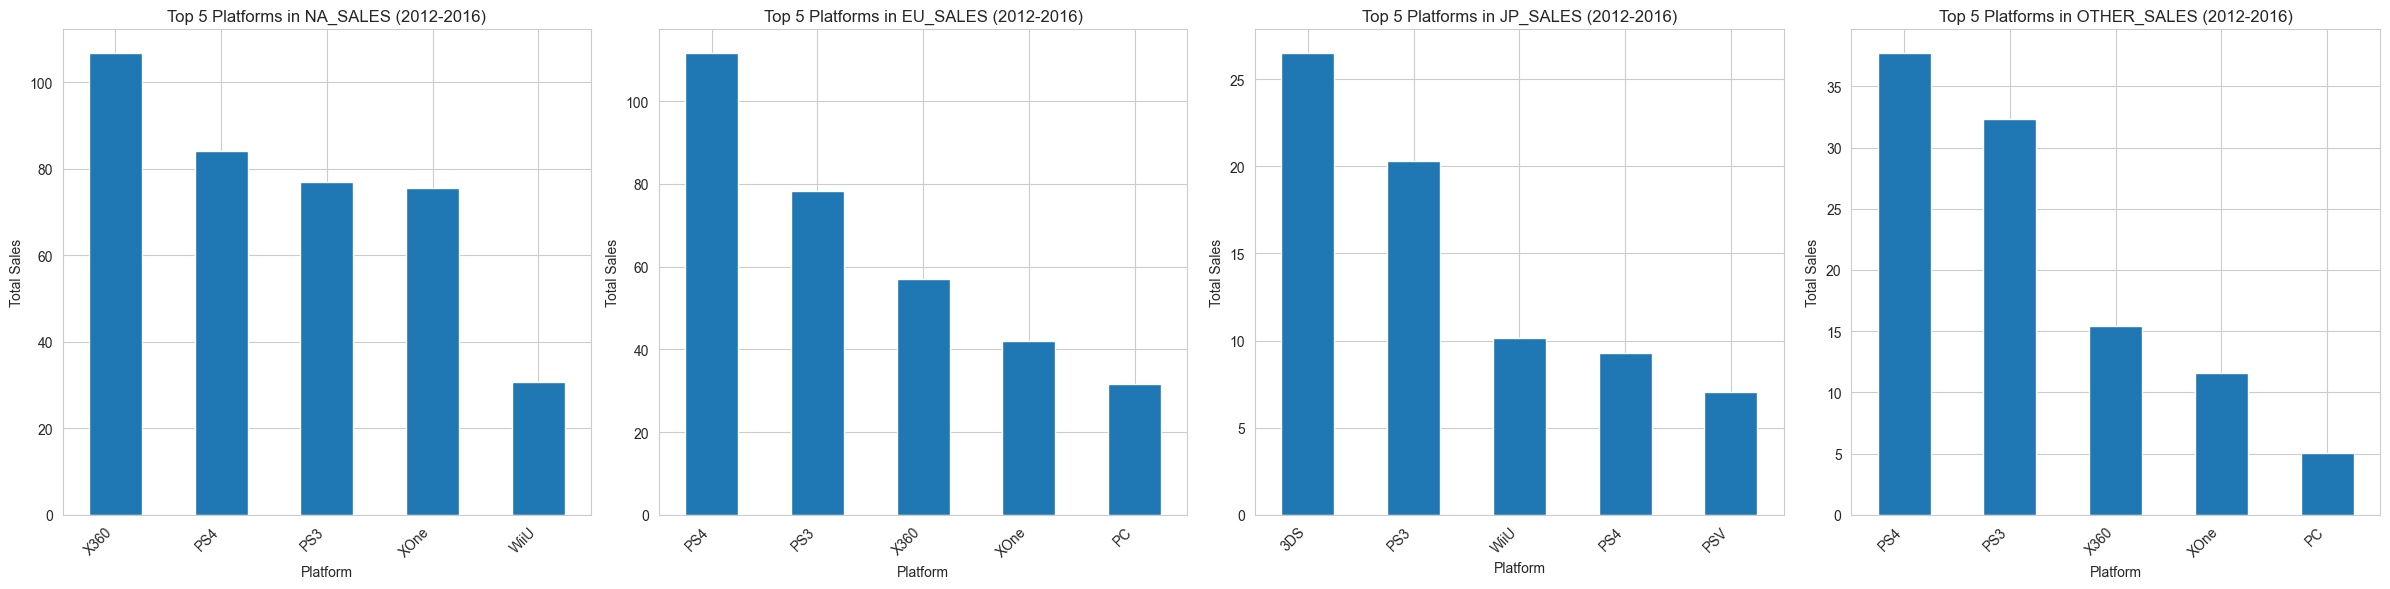

In [30]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Define regions
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Create a dictionary to store the top five platforms for each region
top_platforms_per_region = {}

# Calculate the top five platforms for each region
for region in regions:
    region_sales = filtered_games.groupby('platform')[region].sum().sort_values(ascending=False)
    top_platforms_per_region[region] = region_sales.head(5)

# Display the top five platforms for each region
for region, platforms in top_platforms_per_region.items():
    print(f"Top five platforms in {region.upper()}:")
    print(platforms)
    print()

# Plot the market share variations for each region
plt.figure(figsize=(24, 6))

for i, region in enumerate(regions, 1):
    plt.subplot(1, 4, i)
    top_platforms_per_region[region].plot(kind='bar')
    plt.title(f'Top 5 Platforms in {region.upper()} (2012-2016)')
    plt.xlabel('Platform')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Each region has its own preferences concerning which platform is the favorite. But some commonalities are that for NA, EU and Other PS4 ranks high. It is the highest in EU and Other, While X360 is the highest in NA. JP’s highest-ranking platform is 3DS with the PS4 coming in 4th. The four lowest ranking platforms from NA, EU, JP and Other respectively are WiiU, PC, PSV and PC. PS3 still ranks high in all markets but is not the number one in any market.

Top five genres in NA_SALES:
genre
Action          139.18
Shooter         115.65
Sports           65.83
Role-Playing     36.47
Platform         20.39
Name: na_sales, dtype: float64

Top five genres in EU_SALES:
genre
Action          126.98
Shooter          89.09
Sports           52.75
Role-Playing     28.23
Platform         16.62
Name: eu_sales, dtype: float64

Top five genres in JP_SALES:
genre
Action          20.87
Shooter          7.62
Sports           2.41
Role-Playing    17.46
Platform         7.96
Name: jp_sales, dtype: float64

Top five genres in OTHER_SALES:
genre
Action          41.04
Shooter         28.97
Sports          17.76
Role-Playing     9.13
Platform         4.42
Name: other_sales, dtype: float64



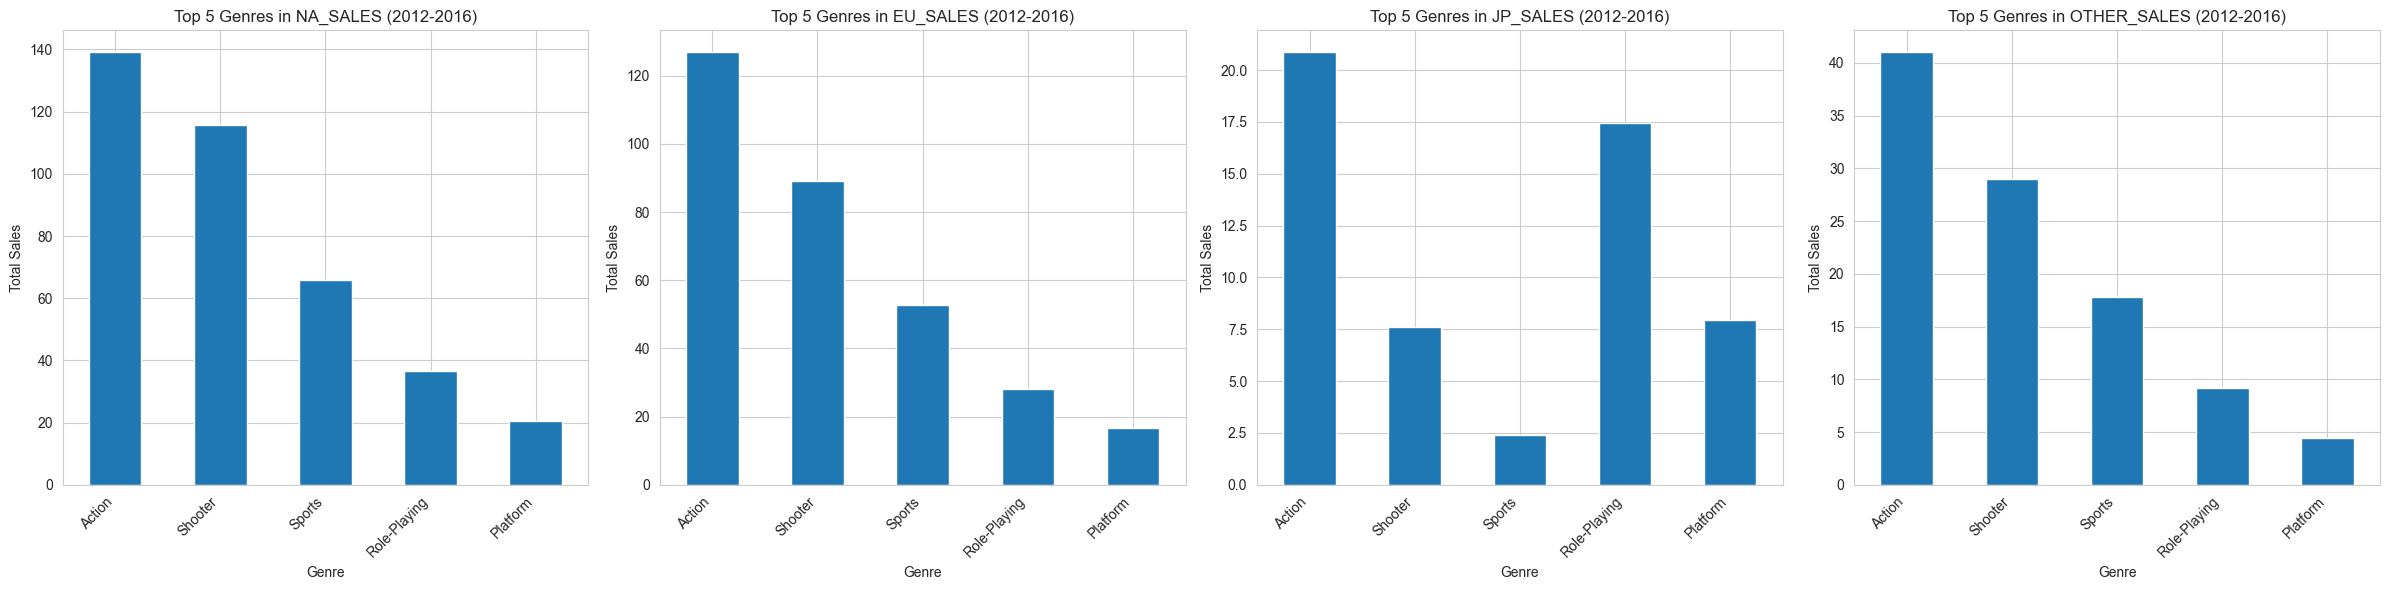

In [31]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Calculate total sales per genre
genre_sales = filtered_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Choose top five genres
top_genres = genre_sales.head(5).index

# Define regions
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Create a dictionary to store the sales for each genre in each region
genre_sales_per_region = {region: filtered_games.groupby('genre')[region].sum() for region in regions}

# Filter the dictionary to include only the top five genres
top_genre_sales_per_region = {region: sales[top_genres] for region, sales in genre_sales_per_region.items()}

# Display the top five genres and their sales in each region
for region, sales in top_genre_sales_per_region.items():
    print(f"Top five genres in {region.upper()}:")
    print(sales)
    print()

# Plot the market share variations for each genre in each region
plt.figure(figsize=(24, 6))

for i, region in enumerate(regions, 1):
    plt.subplot(1, 4, i)
    top_genre_sales_per_region[region].plot(kind='bar')
    plt.title(f'Top 5 Genres in {region.upper()} (2012-2016)')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The most popular genre of games in NA, EU and Other are Action followed by Shooters. They take the main market share. JP differs slightly in that the second most popular genre is Role Playing with Action being the most popular as well. Action games seem to be the most popular around the world.

<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

Please correct the conclusions after correcting the actual period

Looking at Rating (ESRB) correlation

In [32]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Define regions
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# Initialize a dictionary to store the correlation results
rating_sales_corr = {}

# Calculate the correlation between rating and sales for each region
for region in regions:
    # Drop rows with missing values in 'rating' or the region sales column
    filtered_data = filtered_games.dropna(subset=['rating', region]).copy()
    
    # Convert rating to a numerical value
    filtered_data.loc[:, 'rating_num'] = filtered_data['rating'].astype('category').cat.codes
    
    # Calculate the correlation
    corr = filtered_data['rating_num'].corr(filtered_data[region])
    rating_sales_corr[region] = corr

# Display the correlation results
for region, corr in rating_sales_corr.items():
    print(f"Correlation between Rating and {region.upper()} Sales (2012-2016): {corr}")

Correlation between Rating and NA_SALES Sales (2012-2016): -0.056224226401670636
Correlation between Rating and EU_SALES Sales (2012-2016): -0.07403834497887558
Correlation between Rating and JP_SALES Sales (2012-2016): -0.05234931890582396
Correlation between Rating and OTHER_SALES Sales (2012-2016): -0.04244911185387153


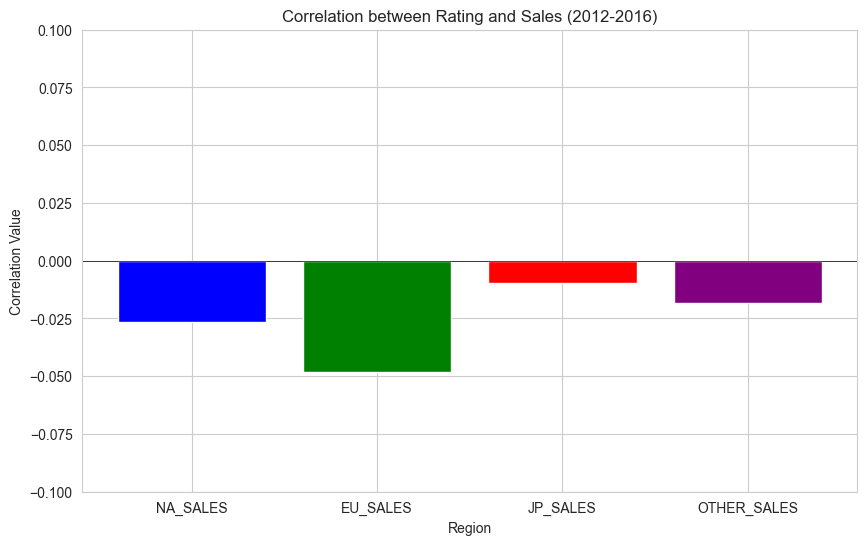

In [33]:
# Define the correlation values
correlation_values = {
    'NA_SALES': -0.026798218496943683,
    'EU_SALES': -0.04834484609369452,
    'JP_SALES': -0.009653813947611212,
    'OTHER_SALES': -0.018183198689939
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(correlation_values.keys(), correlation_values.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Correlation between Rating and Sales (2012-2016)')
plt.xlabel('Region')
plt.ylabel('Correlation Value')
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

null:
There is no correlation between user rating and sales for any region in the dataset from 2012-2016.


Alternative:
There is a correlation between user rating and sales for at least one region in the dataset from 2012-2016.

The data appears to show little to no correlation to ESRB rating having an effect on game sales, so accept the null hypothesis.

<div class="alert alert-block alert-danger">✍
    

__Reviewer's comment №1__

There are no null and alternative hypotheses. Please add them in markdown cell

In [34]:
# Filter the data for Xbox One and PC platforms from 2012 to 2016
xbox_one_ratings = games[(games['platform'] == 'XOne') & (games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]['user_score'].dropna()
pc_ratings = games[(games['platform'] == 'PC') & (games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]['user_score'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(xbox_one_ratings, pc_ratings)

# Set the alpha threshold value
alpha = 0.05

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Determine if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The average user ratings of the Xbox One and PC platforms are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings of the Xbox One and PC platforms are the same.")

T-statistic: 0.8049620506592257
P-value: 0.42141940089256147
Fail to reject the null hypothesis: The average user ratings of the Xbox One and PC platforms are the same.


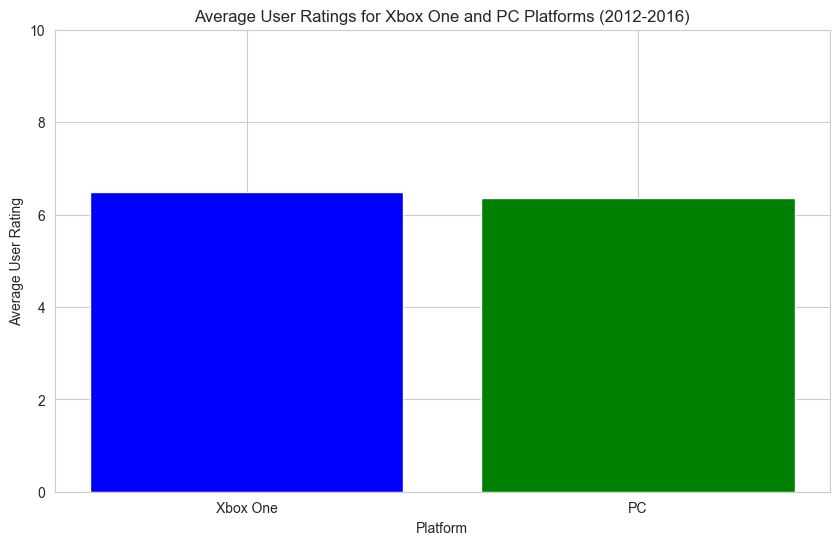

In [35]:
# Calculate the average user ratings for Xbox One and PC platforms
avg_xbox_one_rating = xbox_one_ratings.mean()
avg_pc_rating = pc_ratings.mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
platforms = ['Xbox One', 'PC']
avg_ratings = [avg_xbox_one_rating, avg_pc_rating]
plt.bar(platforms, avg_ratings, color=['blue', 'green'])
plt.title('Average User Ratings for Xbox One and PC Platforms (2012-2016)')
plt.xlabel('Platform')
plt.ylabel('Average User Rating')
plt.ylim(0, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

Null:
The average user ratings of the Xbox One and PC platforms are different.

Alternative:
The average user ratings of the Xbox One and PC platforms are the same.

The null hypothesis was asked in the assignment. Test to see if the user ratings from Xbox and PC are the same. So, conversely the alternative hypothesis would be that the users’ ratings are different. The significance level (alpha 0.05) was chosen because it is an industry standard, and I did not have a good justification for changing it. The ratings from both platforms were the same. This could be due to some overlap for the users having both platforms. Also, people could have similar opinions no matter what platform they are on.

In [36]:
# Filter the data for the years 2012 to 2016
filtered_games = games[(games['year_of_release'] >= 2012) & (games['year_of_release'] <= 2016)]

# Filter the data for Action and Sports genres
action_ratings = filtered_games[filtered_games['genre'] == 'Action']['user_score'].dropna()
sports_ratings = filtered_games[filtered_games['genre'] == 'Sports']['user_score'].dropna()

# Perform the t-test
t_stat, p_value = ttest_ind(action_ratings, sports_ratings)

# Set the alpha threshold value
alpha = 0.05

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Determine if we reject the null hypothesis
if p_value < alpha:
    print("Reject the null hypothesis: The average user ratings for the Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: The average user ratings for the Action and Sports genres are the same.")

T-statistic: 7.963378015212895
P-value: 9.491264299467366e-15
Reject the null hypothesis: The average user ratings for the Action and Sports genres are different.


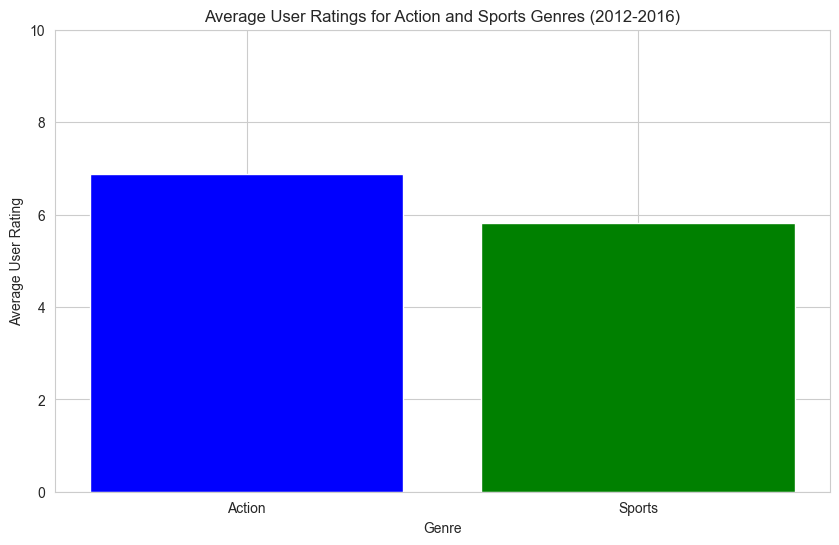

In [37]:
# Calculate the average user ratings for Action and Sports genres
avg_action_rating = action_ratings.mean()
avg_sports_rating = sports_ratings.mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
genres = ['Action', 'Sports']
avg_ratings = [avg_action_rating, avg_sports_rating]
plt.bar(genres, avg_ratings, color=['blue', 'green'])
plt.title('Average User Ratings for Action and Sports Genres (2012-2016)')
plt.xlabel('Genre')
plt.ylabel('Average User Rating')
plt.ylim(0, 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()

Null:
The average user ratings for the Action and Sports genres are different.

Alternative: 
The average user ratings for the Action and Sports genres are the same

The null hypothesis was asked in the assignment. Test to see if the average user ratings for the Action and Sports genres are the same. So, conversely the alternative hypothesis would be that the users’ ratings are different. The significance level (alpha 0.05) was chosen because it is an industry standard, and I did not have a good justification for changing it. There is a slight difference in ratings from action games to sports games with action games being rated higher.

Conclusion:

For optimal targeting, marketing campaigns should prioritize the following platforms:

PS4, X360, and 3DS: These are the top-selling and most recent platforms from their respective manufacturers, indicating continued growth and sustained consumer interest.
Rationale: While the PS3 maintains a significant market share, it is not the latest platform from its manufacturer, and sales are expected to decline. Prioritizing newer platforms ensures longevity and relevance.
Genre Selection:

Marketing campaigns should focus on specific genres based on regional preferences:

North America, Europe, and Other Markets: Action and Shooter games consistently demonstrate the highest sales in these regions.
Japan Market: Role-Playing and Action games are the most popular genres in this region.
Rationale: Aligning marketing efforts with regional genre preferences maximizes the potential for successful campaigns.
Data Selection and Rationale:

The analysis utilizes data from 2012 to 2016 to provide the most relevant and consistent insights into recent gaming trends. Excluding earlier years is justified due to:

Limited Gaming Popularity: The early years of gaming data are less indicative of current trends due to the lower overall popularity of gaming.
Unsustainable Growth: The period from 2001 to 2011 witnessed a significant but unsustainable surge in gaming, making it an unreliable predictor for future trends.
Budget Considerations:

To optimize limited marketing budgets, campaigns should prioritize regions with the highest market share. Therefore, "Other" sales areas, which encompass numerous countries and a smaller market share, will not be the primary focus.

Conclusion

By targeting the recommended platforms and genres in the identified regions, Ice can maximize the effectiveness of its 2017 video game marketing campaigns, leveraging data-driven insights to anticipate market trends and consumer preferences.



<div class="alert alert-block alert-warning">📝
    

__Reviewer's comment №1__

    
Please correct the conclusions after correction